## PREDICTIVE ANALYSIS USING MACHINE LEARNING

# Rainfall of Australia Country Predictive Analysis | EDA

## Problem Statement:

 The main objective of this project is to predict whether or not it will rain in Australia. Rainfall forecast depends on many factors like temperature, humidity, wind speed, wind direction etc.

In our project we eant to build a Machine learning Model that can predict whether it will rain or not with maximum accuracy and minimum error.

## Important Required Libraries

In [1]:
# For EDA libraries
import numpy as np
import pandas as pd

# For handle Outliers
from scipy import stats

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For statical analysis
import time
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For preprocessing
from sklearn.preprocessing import StandardScaler , LabelEncoder

# For train test split
from sklearn.model_selection import train_test_split, GridSearchCV

# For oversampling
from imblearn.over_sampling import SMOTE

# For model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB


# For evaluation 
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , recall_score , precision_score , f1_score

# To hide any warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv("weatherAUS.csv")

In [3]:
# Preview the dataset
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
# Preview the top 10 rows
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [5]:
# Preview the last 10 rows
df.tail(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145450,2017-06-16,Uluru,5.2,24.3,0.0,NaN,NaN,E,24.0,SE,...,53.0,24.0,1023.8,1020.0,NaN,NaN,12.3,23.3,No,No
145451,2017-06-17,Uluru,6.4,23.4,0.0,NaN,NaN,ESE,31.0,S,...,53.0,25.0,1025.8,1023.0,NaN,NaN,11.2,23.1,No,No
145452,2017-06-18,Uluru,8.0,20.7,0.0,NaN,NaN,ESE,41.0,SE,...,56.0,32.0,1028.1,1024.3,NaN,7.0,11.6,20.0,No,No
145453,2017-06-19,Uluru,7.4,20.6,0.0,NaN,NaN,E,35.0,ESE,...,63.0,33.0,1027.2,1023.3,NaN,NaN,11.0,20.3,No,No
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [6]:
# Check for the columns
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

## Column Descriptions:

1. Date:
    Description: Date of Observation Format: yyyy-mm-dd
2. Location:
    Description: The common name of the location of the weather station
3. MinTemp:
    Description: The minimum temperature recorded in degrees Celsius.
4. MaxTemp:
    Description: The maximum temperature recorded in degrees Celsius.
5. Rainfall:
   Description: The amount of rainfall recorded for the day in millimeters.
6. Evaporation:
    Description: The Class A pan evaporation in millimeters in the 24 hours to 9 AM.
7. Sunshine:
    Description: The number of hours of bright sunshine during the day.
8. WindGustDir:
    Description: The direction of the strongest wind gust in the 24 hours to midnight.
9. WindGustSpeed:
     Description: The speed of the strongest wind gust in kilometers per hour in the 24 hours to midnight.
10. WindDir9am:
     Description: The direction of the wind at 9 AM.
11. WindDir3pm:
     Description: The direction of the wind at 3 PM.
13. WindSpeed9am:
     Description: Wind speed averaged over 10 minutes prior to 9 AM in kilometers per hour.
14. WindSpeed3pm:
     Description: Wind speed averaged over 10 minutes prior to 3 PM in kilometers per hour.
15. Humidity9am:
     Description: Humidity percentage at 9 AM.
16. Humidity3pm:
     Description: Humidity percentage at 3 PM.
17. Pressure9am:
     Description: Atmospheric pressure reduced to mean sea level at 9 AM in hectopascals (hPa).
18. Pressure3pm:
     Description: Atmospheric pressure reduced to mean sea level at 3 PM in hectopascals (hPa).
19. Cloud9am:
     Description: Fraction of the sky obscured by cloud at 9 AM, measured in oktas (eighths). A value of 0 indicates a completely                     clear sky, while a value of 8 indicates completely overcast conditions.
20. Cloud3pm:
     Description: Fraction of the sky obscured by cloud at 3 PM, measured in oktas (eighths). See Cloud9am for a description of the                   values.
21. Temp9am:
     Description: Temperature at 9 AM in degrees Celsius.
22. Temp3pm:
     Description: Temperature at 3 PM in degrees Celsius.
23. RainToday:
     Description: Boolean indicator (1 if precipitation in the 24 hours to 9 AM exceeds 1 mm, otherwise 0).
24. RainTomorrow:
     Description: The amount of rainfall the next day in millimeters. Used to create the response variable RainTomorrow, indicating                   the "risk" of rain.

In [7]:
# Check for the shape of dataset
df.shape

(145460, 23)

In [8]:
# Checking for the data types of columns
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [9]:
# Checking test statistics of numeric columns
df.select_dtypes(exclude='object').describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


## Handling missing values

In [10]:
# Check for null value
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [11]:
# Checking the percentage of missing values
df.isnull().sum()/df.shape[0] *100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

## Imputing missing values

In [12]:
# Get unique enteries from Location column of the dataset
unique_location = df['Location'].unique()

# Iterate over each column with missing values which have numeirc data type
for column in df.select_dtypes(exclude='object'):
    # setting up a condition to check missing values 
    if df[column].isnull().any():
        # Iterate over each unique location
        for location in unique_location:
            # Calculate the median value for the each unique location entry and column
            location_median = df[df['Location'] == location][column].median()
            # Fill missing values with the medin of the specific location
            df.loc[df['Location'] == location, column] = df[df['Location'] == location][column].fillna(location_median)
    # Iterate over each column with misssing values which have object data type
    elif df.select_dtypes(include='object'):
        # Iterate over each unique location
        for location in unique_location:
            # Calculate the median value for the each unique location entry and column
            location_mode = df[df['Location'] == location][column].mode()[0]
            # Fill missing values with the mode of the specific location
            df.loc[df['Location'] == location , column ] = df[df['Location']==location][column].fillna(location_mode)

## Description of above Steps:

In the above code, snipet we filled the missing values in the dataset by using a unique startegy:

:We impute missing values according to the unique enteries of the Location colun.

:For the numeric column we calculate the median of the column where values are missing
    by using the unique enteries of the Location column and then fill the missing values with the median.
:Same approach is used for the object column.We calculate the mode of the column where values are missing
    by using the unique enteries of the Location column and then fill the missing values with the mode.

In [13]:
# Confirming the outcome
df.isna().sum() / len(df) *100

Date              0.000000
Location          0.000000
MinTemp           0.000000
MaxTemp           0.000000
Rainfall          0.000000
Evaporation      31.287639
Sunshine         36.552317
WindGustDir       7.098859
WindGustSpeed     4.179156
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      0.000000
WindSpeed3pm      0.000000
Humidity9am       0.000000
Humidity3pm       0.000000
Pressure9am       8.331500
Pressure3pm       8.331500
Cloud9am         24.038911
Cloud3pm         24.038911
Temp9am           0.000000
Temp3pm           0.000000
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

## Observation:
Still we have left with some missing values in the dataset.
These missing values cannot be filled with the above mentioned imputation method.
Becasue these above listed missing values are not collected for the specific location
Hence, we cannot impute these missing values with mean or median of the whole dataset as every city in Location column has its own demographical weather conditions

## Dropping rows with missing values

In [14]:
# Dropping the rows with missing values

df.dropna(subset=['WindGustDir' , 'WindGustSpeed' , 'WindDir9am', 'WindDir3pm' , 'Pressure9am' , 'Pressure3pm' , 'RainToday' ,  'RainTomorrow',
                  'Evaporation','Sunshine', 'Cloud9am' , 'Cloud3pm']
                    , inplace=True  , axis= 0)

In [15]:
# Check for null value once again
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [16]:
# Resetting the index of the dataframe
df.reset_index(drop=True , inplace=True)

In [17]:
# Checking the shape of the dataframe after imputing the missing values
df.shape

(72866, 23)

In [18]:
# Find duplicate value
df.duplicated().sum()

0

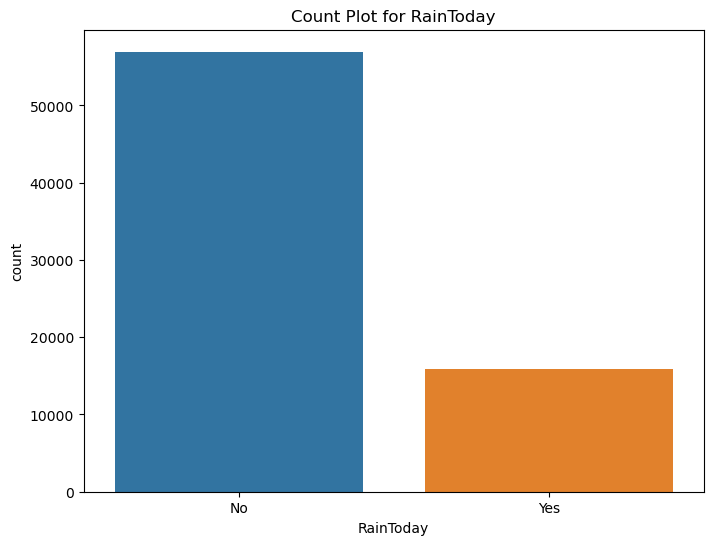

In [19]:
# Count plot for 'RainToday'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='RainToday')
plt.title('Count Plot for RainToday')
plt.show()

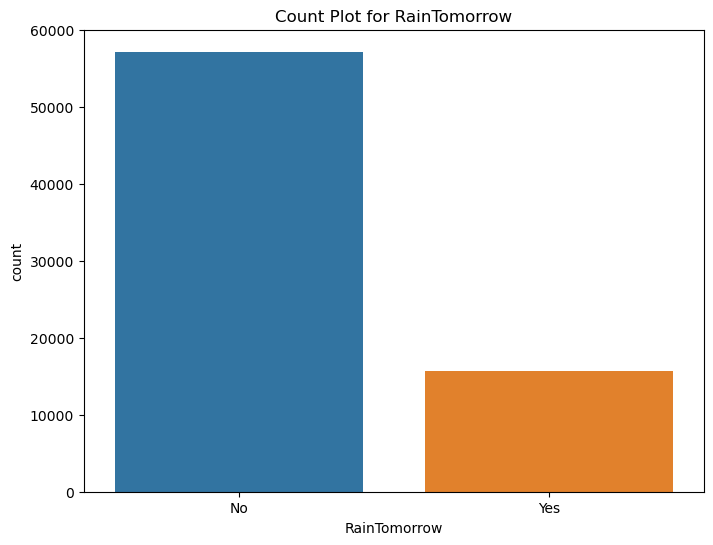

In [20]:
# Count plot for 'RainTomorrow'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='RainTomorrow')
plt.title('Count Plot for RainTomorrow')
plt.show()

array([[<Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'MaxTemp'}>,
        <Axes: title={'center': 'Rainfall'}>,
        <Axes: title={'center': 'Evaporation'}>],
       [<Axes: title={'center': 'Sunshine'}>,
        <Axes: title={'center': 'WindGustSpeed'}>,
        <Axes: title={'center': 'WindSpeed9am'}>,
        <Axes: title={'center': 'WindSpeed3pm'}>],
       [<Axes: title={'center': 'Humidity9am'}>,
        <Axes: title={'center': 'Humidity3pm'}>,
        <Axes: title={'center': 'Pressure9am'}>,
        <Axes: title={'center': 'Pressure3pm'}>],
       [<Axes: title={'center': 'Cloud9am'}>,
        <Axes: title={'center': 'Cloud3pm'}>,
        <Axes: title={'center': 'Temp9am'}>,
        <Axes: title={'center': 'Temp3pm'}>]], dtype=object)

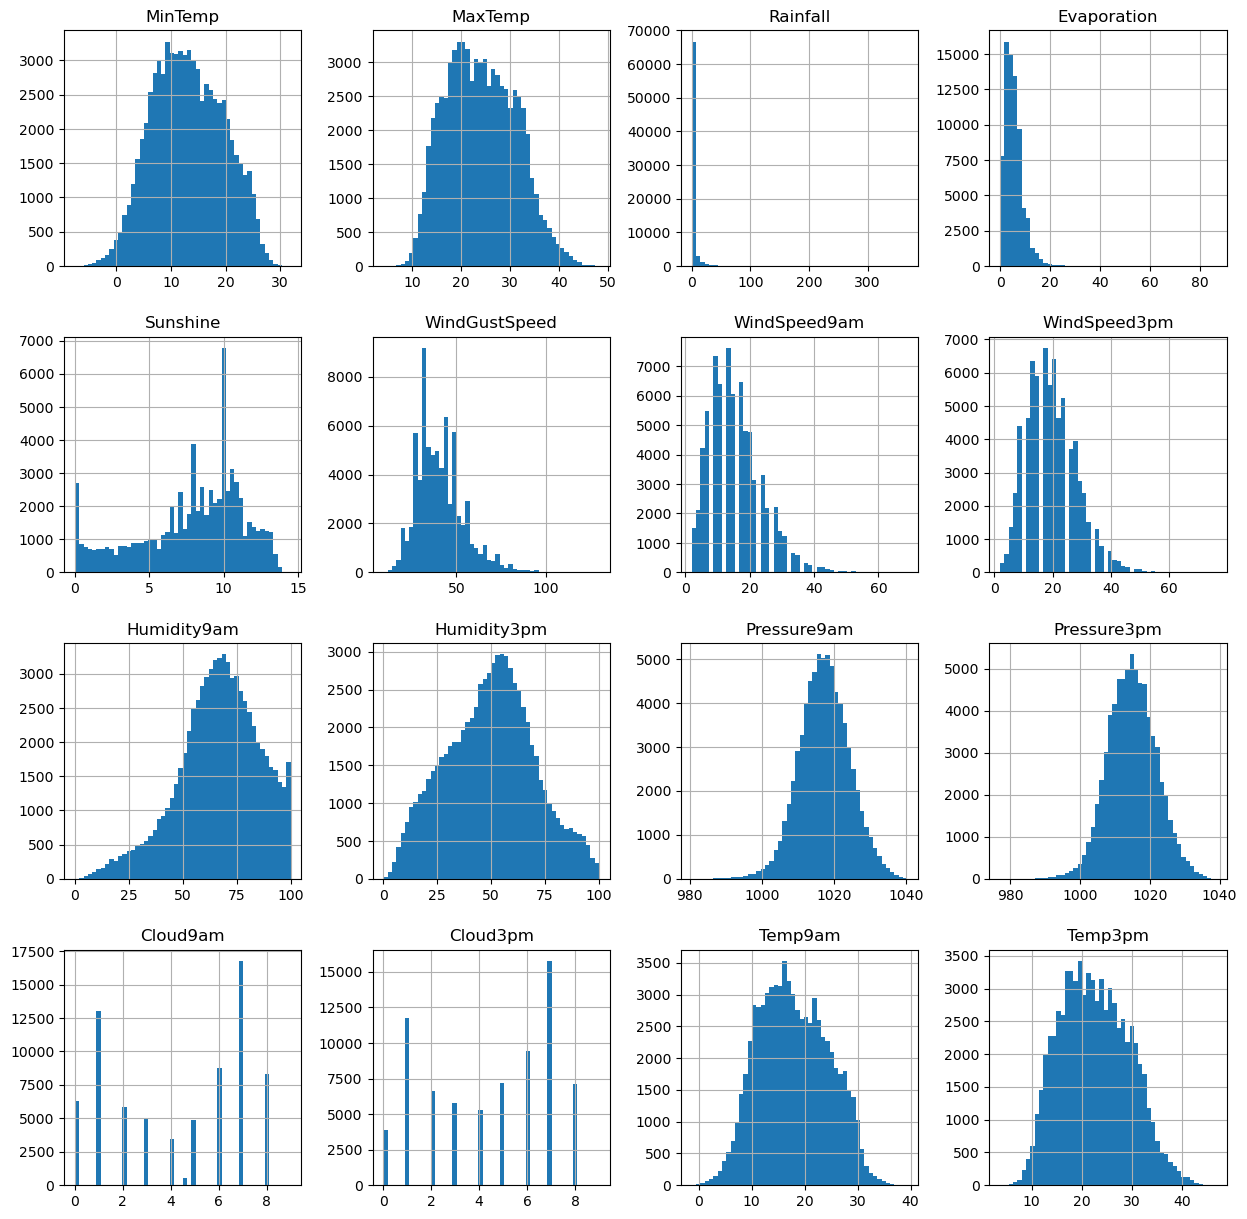

In [21]:
# Histograms of the numerical columns
df.hist(figsize=(15,15), bins=50)

## Feature Engineering

## Feature extraction from Date

In [22]:
# Extract useful components from date columns (e.g., year, month, day, weekday, etc.)
df['year'] = pd.to_datetime(df['Date']).dt.year
df['month'] = pd.to_datetime(df['Date']).dt.month
df['day_of_week'] = pd.to_datetime(df['Date']).dt.dayofweek

In [23]:
# Dropping the Date column
df.drop(['Date'] , axis=1 , inplace=True)

In [24]:
# Checking the column names
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'year', 'month', 'day_of_week'],
      dtype='object')

In [25]:
# Checking the first 5 rows
df.head(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day_of_week
0,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,...,1004.4,2.0,5.0,26.6,33.4,No,No,2009,1,3
1,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,...,1012.1,1.0,1.0,20.3,27.0,No,No,2009,1,4
2,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,...,1009.2,1.0,6.0,28.7,34.9,No,No,2009,1,6
3,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,...,1009.1,1.0,5.0,29.1,35.6,No,No,2009,1,0
4,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,...,1007.4,1.0,6.0,33.6,37.6,No,No,2009,1,1


## Exploratory Data Analysis

In [26]:
# Check for the count of unique values in each column
df.nunique().sort_values(ascending=True)

RainTomorrow       2
RainToday          2
day_of_week        7
Cloud3pm          10
year              11
Cloud9am          11
month             12
WindGustDir       16
WindDir9am        16
WindDir3pm        16
Location          26
WindSpeed9am      37
WindSpeed3pm      38
WindGustSpeed     64
Humidity3pm      101
Humidity9am      101
Sunshine         146
Evaporation      341
MinTemp          370
Temp9am          388
MaxTemp          400
Temp3pm          403
Pressure3pm      522
Pressure9am      526
Rainfall         576
dtype: int64

In [27]:
# Checking for duplicate rows
print("duplicate rows = " ,df.duplicated().sum())

duplicate rows =  0


## Getting info from year & Location column

In [28]:
# Checking the unique values of year
df.year.unique()

array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2007, 2008])

In [29]:
# Checking the count of each year
df.year.value_counts().sort_index()

year
2007      61
2008    1338
2009    8574
2010    8693
2011    8008
2012    8117
2013    8165
2014    8531
2015    8473
2016    8718
2017    4188
Name: count, dtype: int64

In [30]:
# Checking the column names
df.columns 

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'year', 'month', 'day_of_week'],
      dtype='object')

In [31]:
# Checking the unique values of Location
df.Location.nunique()

26

In [32]:
# Checking the unique enteries of Location column
df.Location.unique()

array(['Cobar', 'CoffsHarbour', 'Moree', 'NorfolkIsland', 'Sydney',
       'SydneyAirport', 'WaggaWagga', 'Williamtown', 'Canberra', 'Sale',
       'MelbourneAirport', 'Melbourne', 'Mildura', 'Portland', 'Watsonia',
       'Brisbane', 'Cairns', 'Townsville', 'MountGambier', 'Nuriootpa',
       'Woomera', 'PerthAirport', 'Perth', 'Hobart', 'AliceSprings',
       'Darwin'], dtype=object)

In [33]:
# Checking the count of each Location
df.Location.value_counts().sort_index()

Location
AliceSprings        2748
Brisbane            3029
Cairns              2900
Canberra            2762
Cobar               2925
CoffsHarbour        2568
Darwin              3119
Hobart              3106
Melbourne           2240
MelbourneAirport    2943
Mildura             2903
Moree               2635
MountGambier        2898
NorfolkIsland       2868
Nuriootpa           2812
Perth               3049
PerthAirport        2924
Portland            2890
Sale                2771
Sydney              2285
SydneyAirport       2941
Townsville          2884
WaggaWagga          2801
Watsonia            2745
Williamtown         2203
Woomera             2917
Name: count, dtype: int64

## Observation:

The data is collected from the 26 cities of Australia over the period of 11 years which starts from 2007 to 2017.

## Getting info from MinTemp column

## Location with lowest MinTemp

In [34]:
# Location with lowest MinTemp
df.groupby(['Location' , 'year' , 'month'])['MinTemp'].min().sort_values(ascending=True).head()

Location  year  month
Canberra  2014  8       -7.6
          2015  6       -7.0
          2011  5       -6.9
          2012  9       -6.8
          2011  7       -6.7
Name: MinTemp, dtype: float64

In [35]:
# Describing the MinTemp 
df['MinTemp'].describe()

count    72866.000000
mean        13.125480
std          6.464502
min         -7.600000
25%          8.200000
50%         12.900000
75%         18.000000
max         31.900000
Name: MinTemp, dtype: float64

## Location with avg MinTemp

In [36]:
# Calculating the mean of MinTemp
mean_MinTemp = df['MinTemp'].mean()

# Location with avg MinTemp
df.loc[df['MinTemp'] == mean_MinTemp.round(1)][['MinTemp' , 'Location',  'year' , 'month']].sort_values( by='Location')

,MinTemp,Location,year,month
68366,13.1,AliceSprings,2013,4
69481,13.1,AliceSprings,2016,8
69419,13.1,AliceSprings,2016,6
68607,13.1,AliceSprings,2014,1
68551,13.1,AliceSprings,2013,11
...,...,...,...,...
55093,13.1,Woomera,2009,4
57496,13.1,Woomera,2016,4
57694,13.1,Woomera,2016,10
55076,13.1,Woomera,2009,3


## Observation:
Average MinTemp is 13.12 The range of MinTemp lies between -7.6 to 31.9 Cannebra is the coldest city in Australia with MinTemp of -7.6

## Getting info from MaxTemp column

In [37]:
# Test statistics of MaxTemp
df.MaxTemp.describe()

count    72866.000000
mean        24.064079
std          7.015507
min          4.100000
25%         18.500000
50%         23.700000
75%         29.400000
max         48.100000
Name: MaxTemp, dtype: float64

In [38]:
# Count of the unique values in MaxTemp
df.MaxTemp.nunique()

400

## Location with highest MaxTemp

In [39]:
# Group by 'Location', 'year', 'month' and calculate the mean or another aggregation function for 'MaxTemp'
grouped_df = df.groupby(['Location', 'year', 'month'])['MaxTemp'].max().reset_index()

# Sort the resulting DataFrame by 'MaxTemp' in descending order
grouped_df.sort_values(by='MaxTemp', ascending=False).head()

,Location,year,month,MaxTemp
2493,Woomera,2011,1,48.1
1192,Moree,2017,2,47.3
1155,Moree,2014,1,47.3
901,MelbourneAirport,2009,2,46.8
2563,Woomera,2017,2,46.8


## Observations:
According to the test statistics, the rane of MaxTemp lies in between 4.1 to 48.1 And, there are 400 unique values in MaxTemp Woomera is the hottest city in Australia with the MaxTemp of 48.1 in 2011

## Getting info from Rainfall column

In [40]:
# Test statistics of Rainfall
df.Rainfall.describe()

count    72866.000000
mean         2.378084
std          9.085335
min          0.000000
25%          0.000000
50%          0.000000
75%          0.600000
max        367.600000
Name: Rainfall, dtype: float64

## Bar plot of Rainfall v/s year

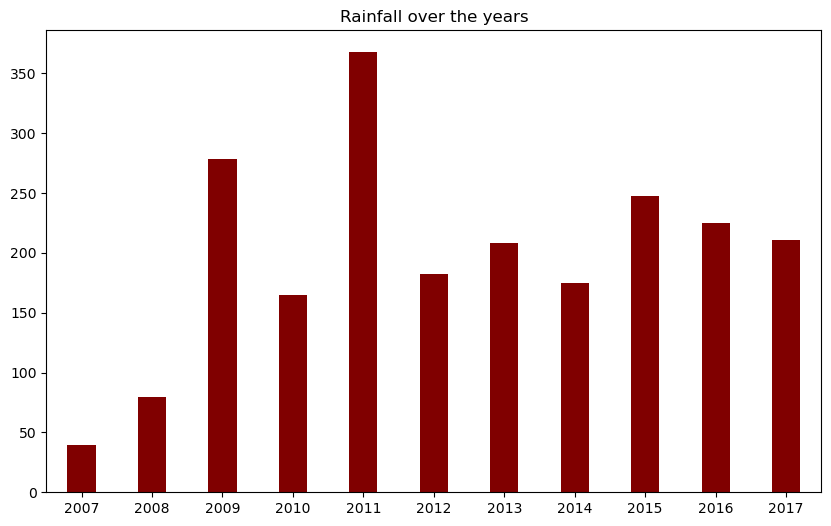

In [41]:
# Defining the figure size
plt.figure(figsize=(10,6))

# Plotting the graph
plt.bar(df.year, df.Rainfall , color ='maroon', width = 0.4)

# Set x-axis limits
plt.xlim(2007-0.5, 2017+0.5)

# Set x-tick labels, creating ticks for each year between 2007 and 2017
plt.xticks(np.arange(2007, 2018, 1))

plt.title("Rainfall over the years")
plt.show()

## Location with highest Rainfall

In [42]:
# Find the maximum rainfall value
max_rainfall = df['Rainfall'].max()

# Filter the DataFrame to get the location(s) with the maximum rainfall
df[df['Rainfall'] == max_rainfall][['Location' , 'Rainfall' , 'year', 'month']]

,Location,Rainfall,year,month
70689,Darwin,367.6,2011,2


## Observation:
Average Rainfall for the period when data is collected is 2.37 mm Darwin experience is highest amount of Rainfall in 2nd month of 2011 which recorded as 367.6 mm Data shows highest Rainfall occured in 2011 followed by 2009 and 2015

## Getting info from Sunshine column

In [43]:
# Find the count of unique values in Sunshine
df.Sunshine.nunique()

146

In [44]:
# Test statistics of Sunshine
df.Sunshine.describe().T

count    72866.000000
mean         7.874997
std          3.505031
min          0.000000
25%          5.900000
50%          8.600000
75%         10.400000
max         14.500000
Name: Sunshine, dtype: float64

## Location with maximumhours of Sunshine

In [45]:
max_sunshine = df['Sunshine'].max()
df.loc[df['Sunshine'] == max_sunshine][['Location' ,'Sunshine' ,'year' , 'month']].sort_values(ascending=False , by = 'Location')

,Location,Sunshine,year,month
34322,Mildura,14.5,2015,12


## Top ten Location with maximum hours of Sunshine

In [46]:
df.groupby(['Location' , 'year' , 'month'])['Sunshine'].max().reset_index().sort_values(ascending=False, by='Sunshine').head(10)

,Location,year,month,Sunshine
1079,Mildura,2015,12,14.5
1430,Nuriootpa,2011,12,14.3
1210,MountGambier,2010,1,14.3
1711,Portland,2010,1,14.3
2469,Woomera,2009,1,14.2
733,Hobart,2010,11,14.2
2240,WaggaWagga,2014,12,14.1
1488,Nuriootpa,2016,12,14.1
1767,Portland,2014,12,14.1
1429,Nuriootpa,2011,11,14.1


## Location with min hours of Sunshine

In [47]:
df.groupby(['Location' , 'year' , 'month'])['Sunshine'].min().sort_values(ascending=True)

Location      year  month
Woomera       2017  6         0.0
PerthAirport  2012  5         0.0
Hobart        2014  2         0.0
                    3         0.0
                    4         0.0
                             ... 
AliceSprings  2017  2        10.6
                    5        10.6
                    4        10.6
                    1        10.6
              2016  11       10.6
Name: Sunshine, Length: 2568, dtype: float64

## Observation:
Sunshine column has 146 unique values The maximum hours of Sunshine observed is 14.5 hours in Mildura city in 2015 in the month of December The average hours of sunshine observed is 7.87 with 50% areas have experience more than 8 hours of sunshine Womera , Perth and Hobart has experience no sunshine in 2017 , 2012 and 2014 respectively for the particular months of June, May and Feburary

In [48]:
# Columns in the dataframe
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'year', 'month', 'day_of_week'],
      dtype='object')

## Getting info from Cloud9am column

In [49]:
# Unique values of Cloud9am
df.Cloud9am.unique()

array([2. , 1. , 8. , 3. , 0. , 4. , 7. , 5. , 6. , 4.5, 9. ])

In [50]:
# Value counts of Cloud9am
df.Cloud9am.value_counts()

Cloud9am
7.0    16776
1.0    13027
6.0     8757
8.0     8320
0.0     6317
2.0     5881
3.0     4936
5.0     4853
4.0     3458
4.5      540
9.0        1
Name: count, dtype: int64

In [51]:
# Descriptive statistics of Cloud9am
df.Cloud9am.describe()

count    72866.000000
mean         4.345881
std          2.777711
min          0.000000
25%          1.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: Cloud9am, dtype: float64

## City in Location column with highest cloud9am oktas in the whole year

In [52]:
# Which city in the location column has highest cloud9am octas in the whole year
df.groupby(['Location' , 'year' , 'month'])['Cloud9am'].max().reset_index().sort_values(ascending=  False, by='Cloud9am').head(10)

,Location,year,month,Cloud9am
351,Canberra,2012,5,9.0
0,AliceSprings,2008,12,8.0
1608,PerthAirport,2009,9,8.0
1610,PerthAirport,2009,11,8.0
1613,PerthAirport,2010,2,8.0
1614,PerthAirport,2010,3,8.0
1615,PerthAirport,2010,4,8.0
1617,PerthAirport,2010,6,8.0
1619,PerthAirport,2010,8,8.0
1620,PerthAirport,2010,9,8.0


## city in Location column with lowest cloud9am oktas in the whole year

In [53]:
# Which city in the location column has lowest cloud9am octas in the whole year
df.loc[df['Cloud9am'].idxmin() , ['Location' , 'Cloud9am' , 'year' , 'month']]

Location    Cobar
Cloud9am      0.0
year         2009
month           1
Name: 10, dtype: object

In [54]:
# Find the row with the highest Cloud9am
max_cloud9am_row = df.loc[df['Cloud9am'].idxmax()]

# Display the location with the highest Cloud9am
print(max_cloud9am_row['Location'])

Canberra


## Observations:
The Cloud9am column has 11 unique values ranges from 0 to 9 0 means no cloud whereas 9 means overcast The average cloud9am observed is 4.34 with 50% areas have experience 5 oktas Canberra is the only location with the cloud9am oktas of 9 in the whole year in the month of May in our dataset

## Preprocessing the data

In [55]:
# Checking data types of columns 
df.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
year               int32
month              int32
day_of_week        int32
dtype: object

## Checking for outliers by using boxplot

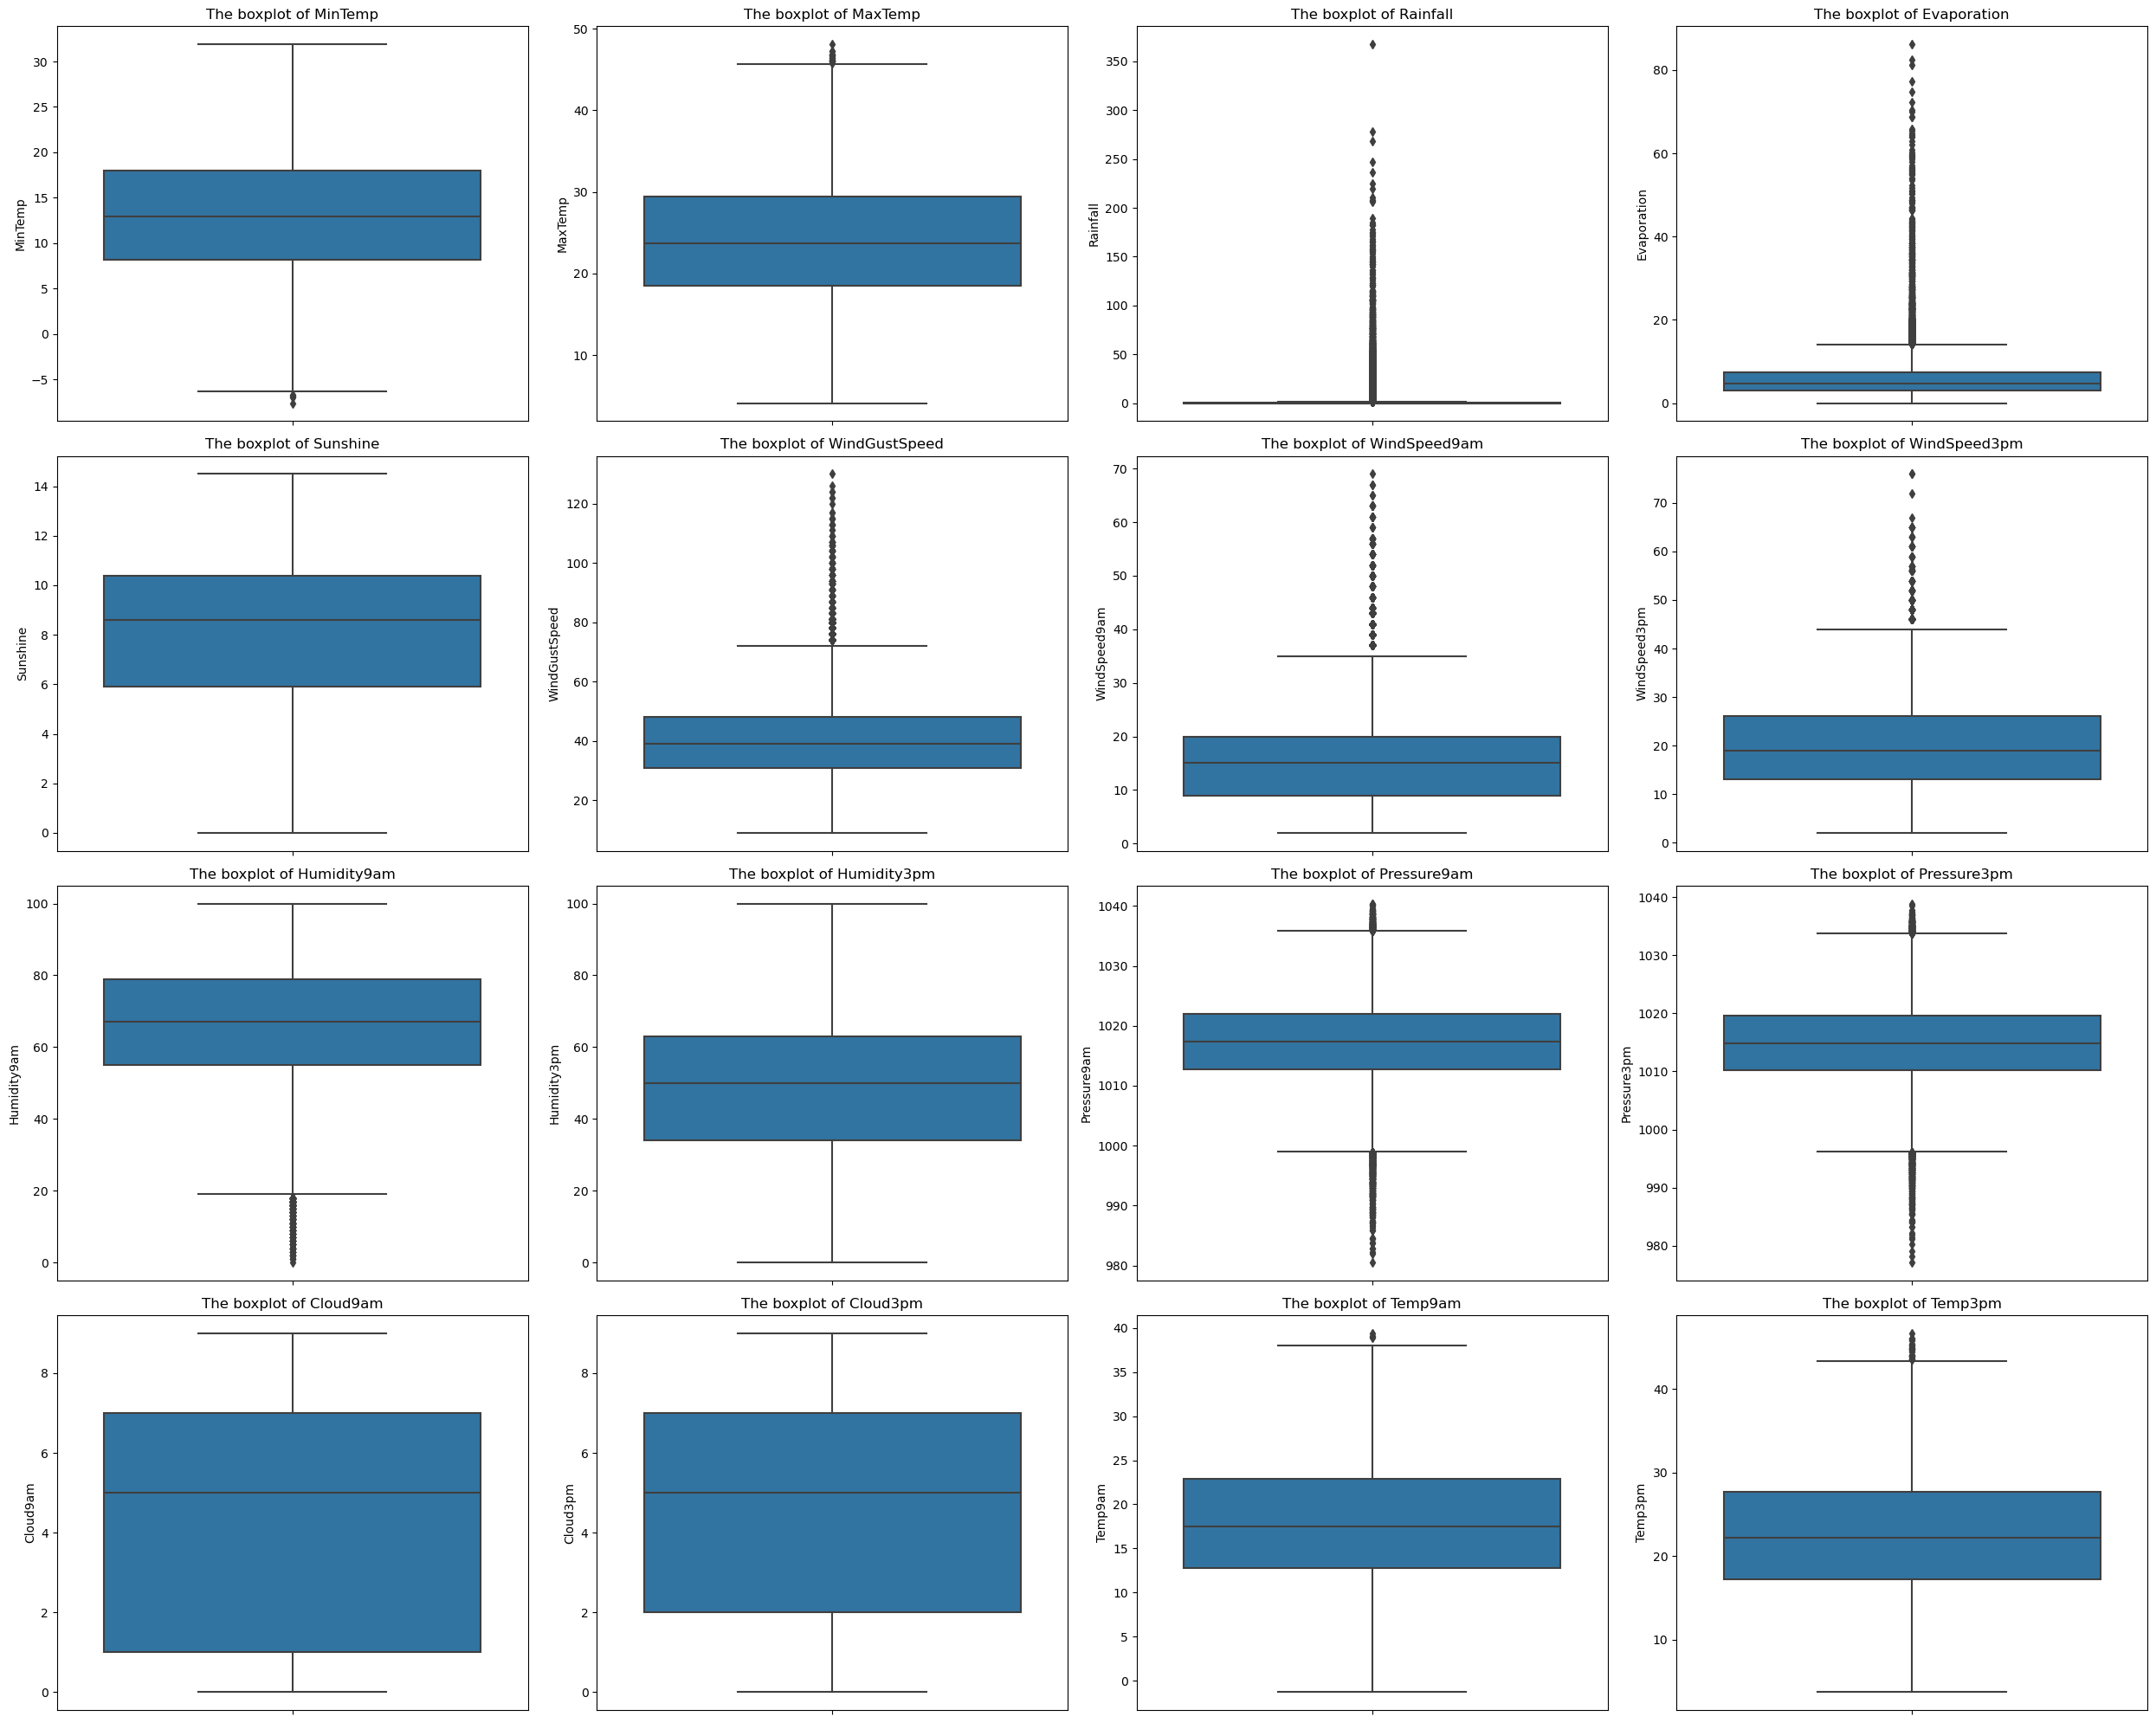

In [56]:
# Select numeric columns excluding 'object' and 'int32'
numeric_cols = df.select_dtypes(exclude=['object', 'int32']).columns

# Defining the figure size
plt.figure(figsize=(25,20))  

# Making for loop for subplots
for column in range(len(numeric_cols)):
    plt.subplot(4, 4, column+1)
    # Plotting boxplot
    sns.boxplot(y=df[numeric_cols[column]])  
    # Defining column name for as title for each boxplot
    plt.title(f'The boxplot of {numeric_cols[column]}')  
# Adjusting the spacing between subplots
plt.tight_layout()  
plt.show()

## Observation:
Columns like MaxTemp , Rainfall , Evaporation , WindGustSpeed , WindSpeed9am , WindSpeed3pm , Humidity9am , Pressure3pm , Pressure9am , Temp9am , Temp3pm have outliers. Foe dealing these outliers we will use IQR (Interquantile range)

In [57]:
# List of columns to check data types
col = ['MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure3pm', 'Pressure9am', 'Temp9am', 'Temp3pm']

for i in col:
    print(f"{i}: {df[i].dtype}")

MaxTemp: float64
Rainfall: float64
Evaporation: float64
WindGustSpeed: float64
WindSpeed9am: float64
WindSpeed3pm: float64
Humidity9am: float64
Pressure3pm: float64
Pressure9am: float64
Temp9am: float64
Temp3pm: float64


In [58]:
# List of column which have outliers
col = ['MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure3pm', 'Pressure9am', 'Temp9am', 'Temp3pm']

# For loop for replacing outliers
for i in col:
    # Find Q1 and Q3
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    # Find IQR
    iqr = q3 - q1
    # Find lower and upper limits
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    # Find median of the column
    median = df[i].median()
    
    # Replace outliers with median
    df[i] = np.where((df[i] < lower_limit) | (df[i] > upper_limit), median, df[i])

## Confirming outcomes by using boxplot again

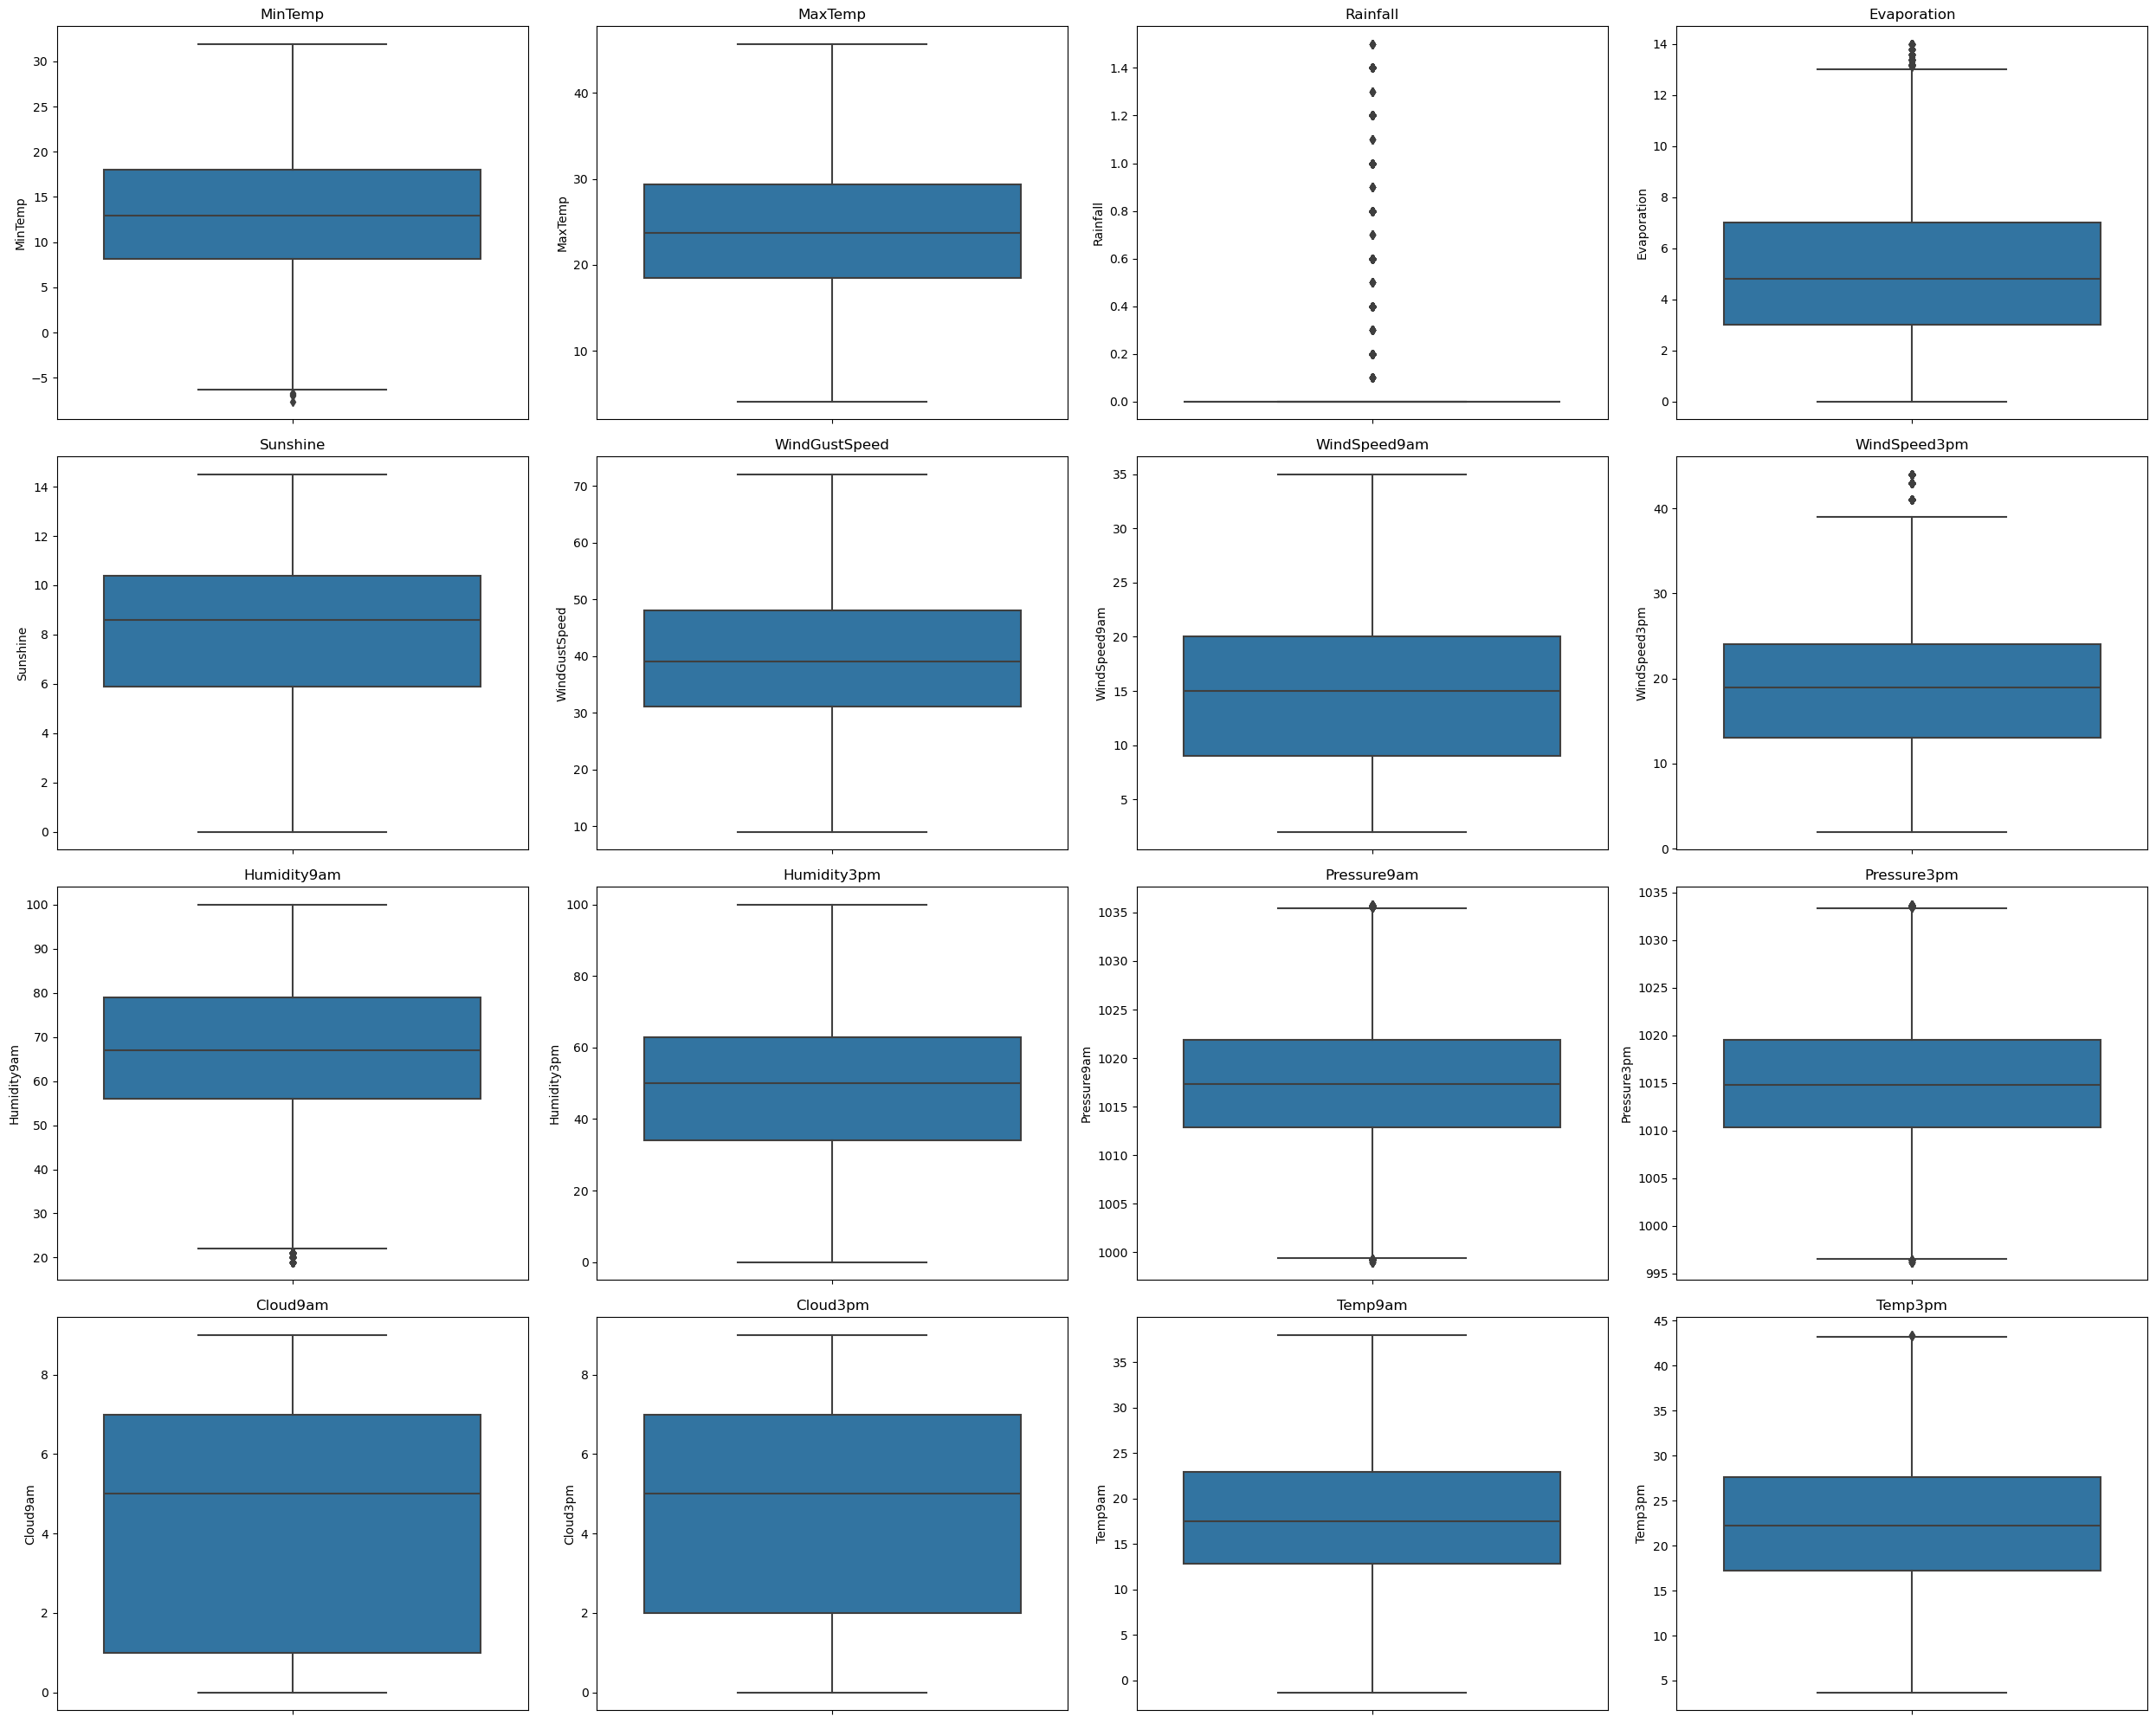

In [59]:
# Select numeric columns excluding 'object' and 'int32'
numeric_cols = df.select_dtypes(exclude=['object', 'int32']).columns

# Defining the figure size
plt.figure(figsize=(25, 20))

# Making for loop for subplots
for col in range(len(numeric_cols)):
    # Defining subplot
    plt.subplot(4, 4, col+1)
    # Plotting boxplot
    sns.boxplot(y=df[numeric_cols[col]])
    plt.title(numeric_cols[col])

# Adjusting the spacing between subplots
plt.tight_layout()
plt.show()

## Observation:
The outliers have been replaced with median Some columns like Rainfall , Evaporation , WindSpeed3pm have left with extreme values

## Checking distribution numeric columns by using histogram

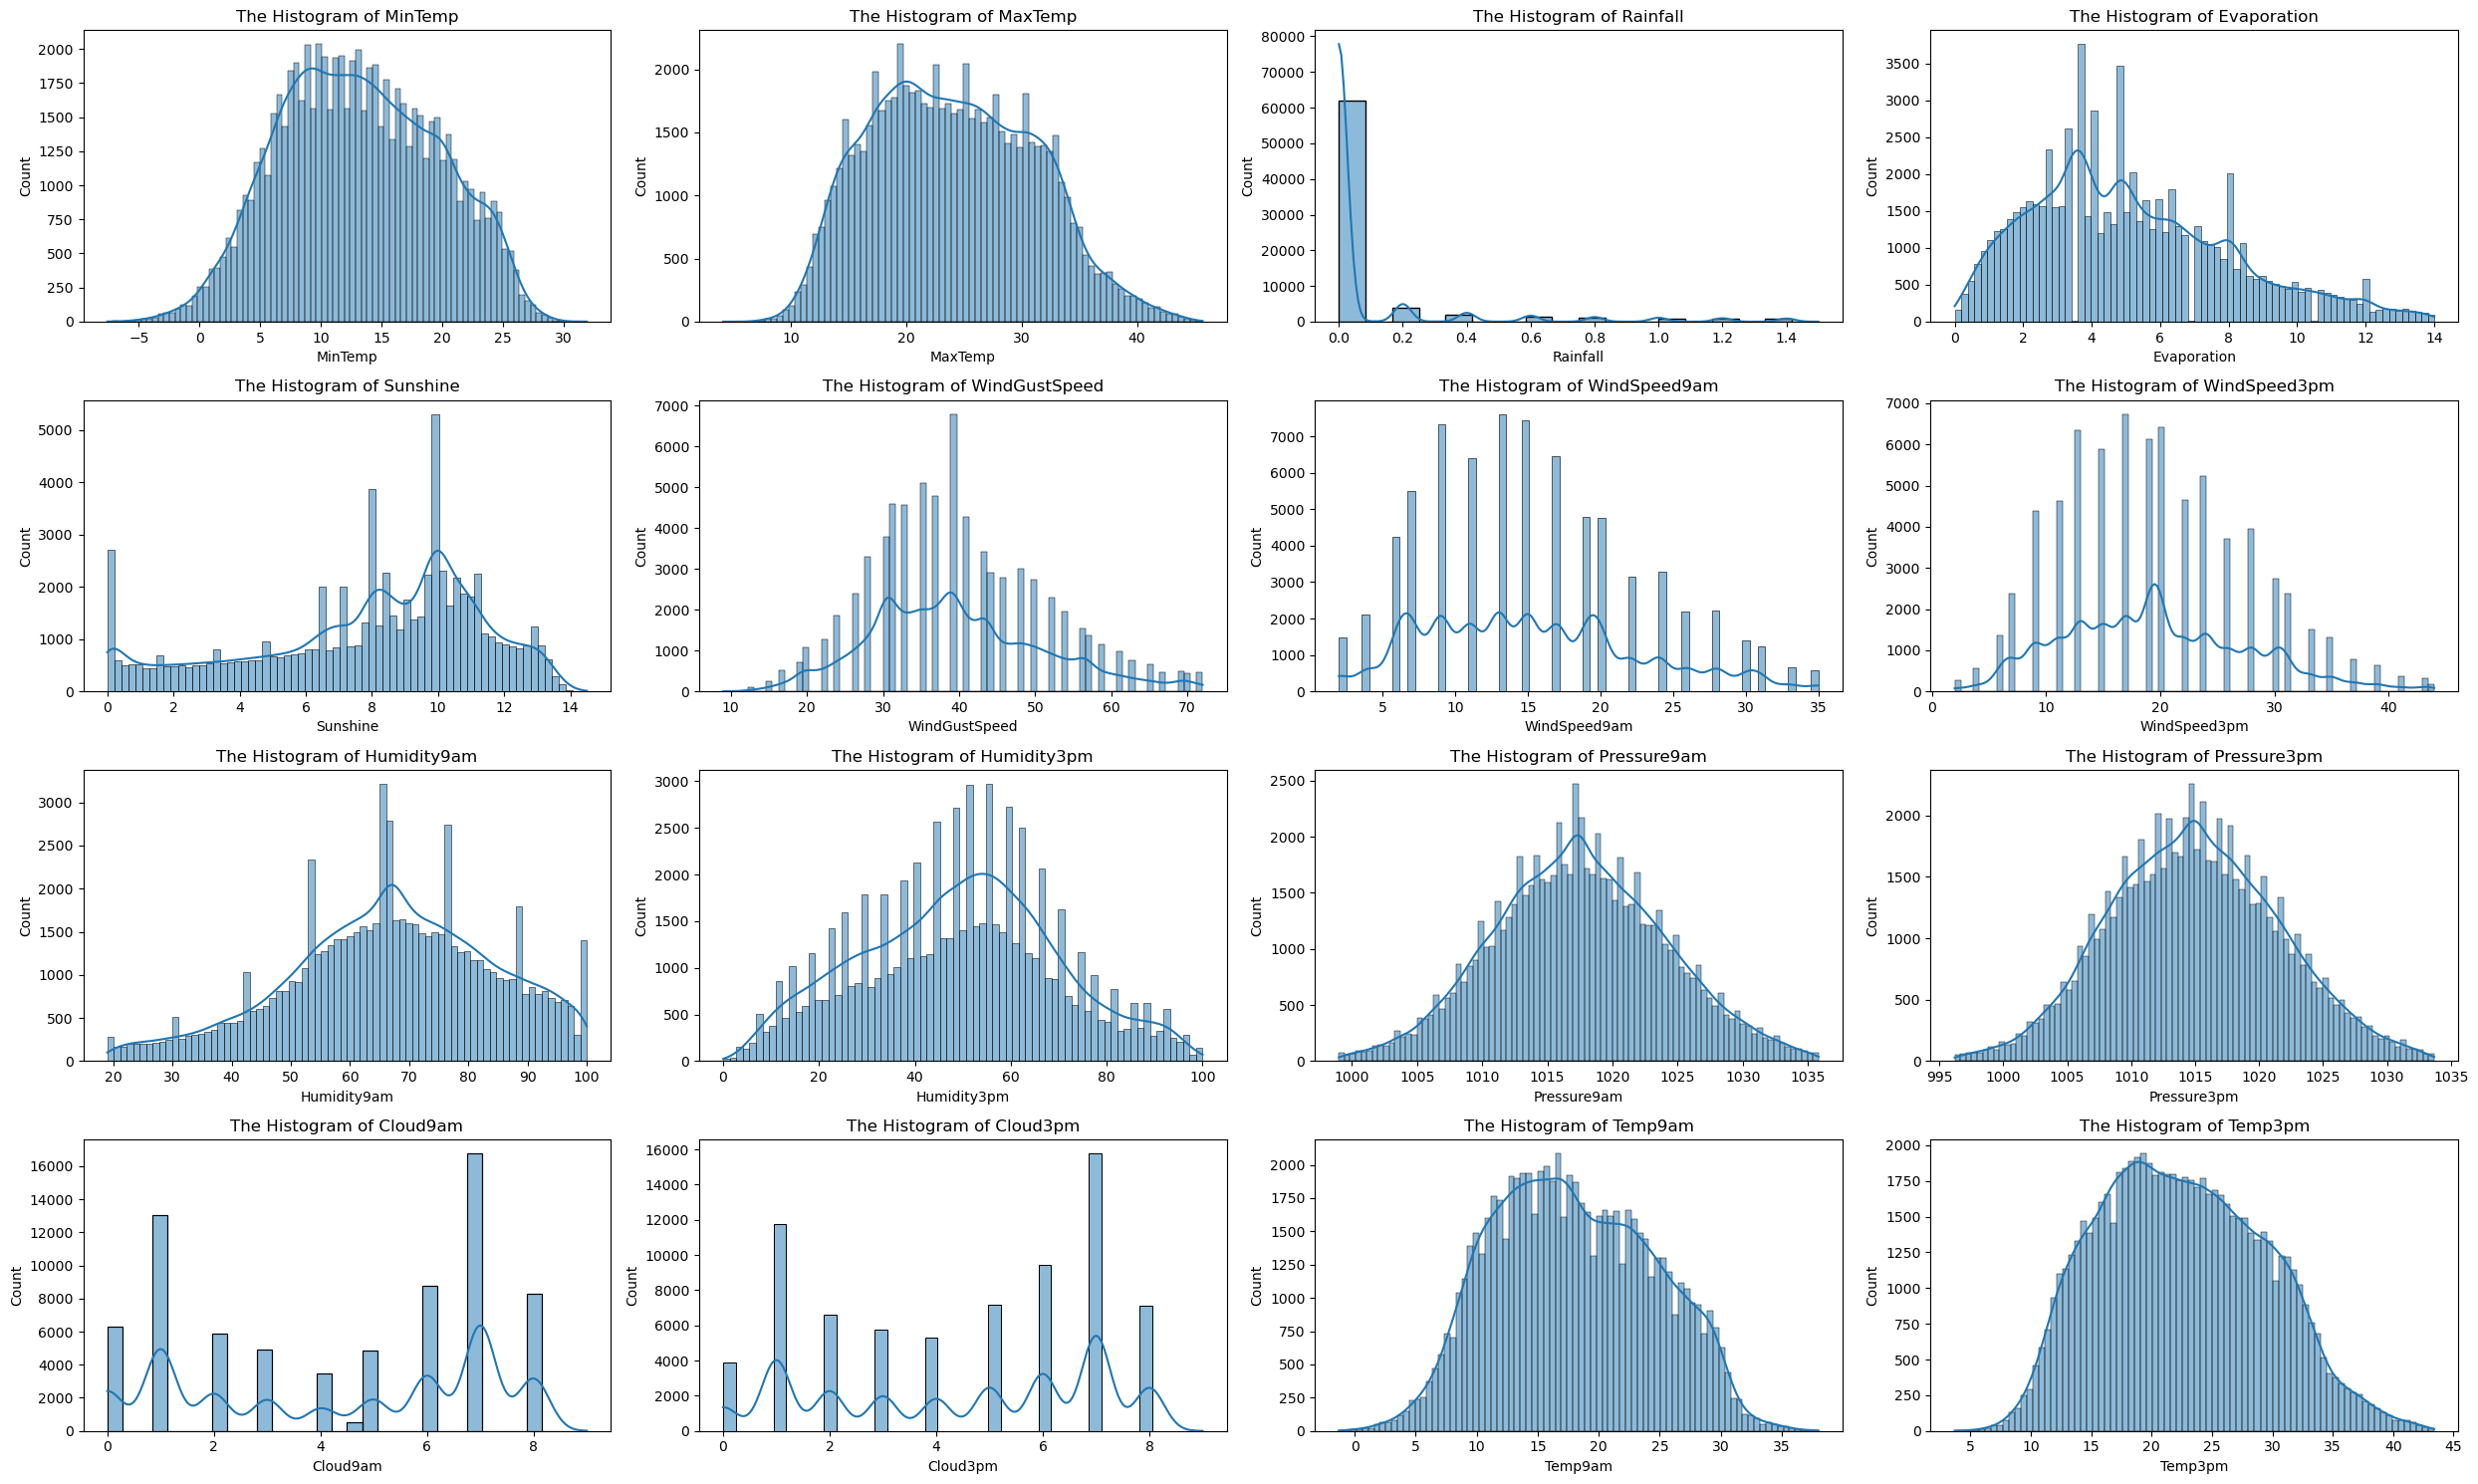

In [60]:
# Select numeric columns excluding 'object' and 'int32'
numeric_cols = df.select_dtypes(exclude=['object', 'int32']).columns

# Create subplots
plt.figure(figsize=(25, 15))  # Adjust the figure size as needed

# Defining the for loop to print subplots
for column in range(len(numeric_cols)):
    plt.subplot(4, 4, column+1)
    # Plotting histogram
    sns.histplot(x=df[numeric_cols[column]] , kde=True) 
    # Defining column name as title for each histogram
    plt.title(f'The Histogram of {numeric_cols[column]}') 

# Adjusting the spacing between subplots
plt.tight_layout()  
plt.show()

## Standardizing the numeric columns

In [61]:
# Selecting specific columns from the dataset
sc_col = df.select_dtypes(include='float64').columns
sc_col = sc_col.drop(['Rainfall' , 'Cloud9am' , 'Cloud3pm'])

# Defining the standard scaler
sc = StandardScaler()

# Defining the for loop for standard scaling
for col in sc_col:
    df[col] = sc.fit_transform(df[[col]])

## Confirming the outcome of Standard Scaling by again plotting Histogram

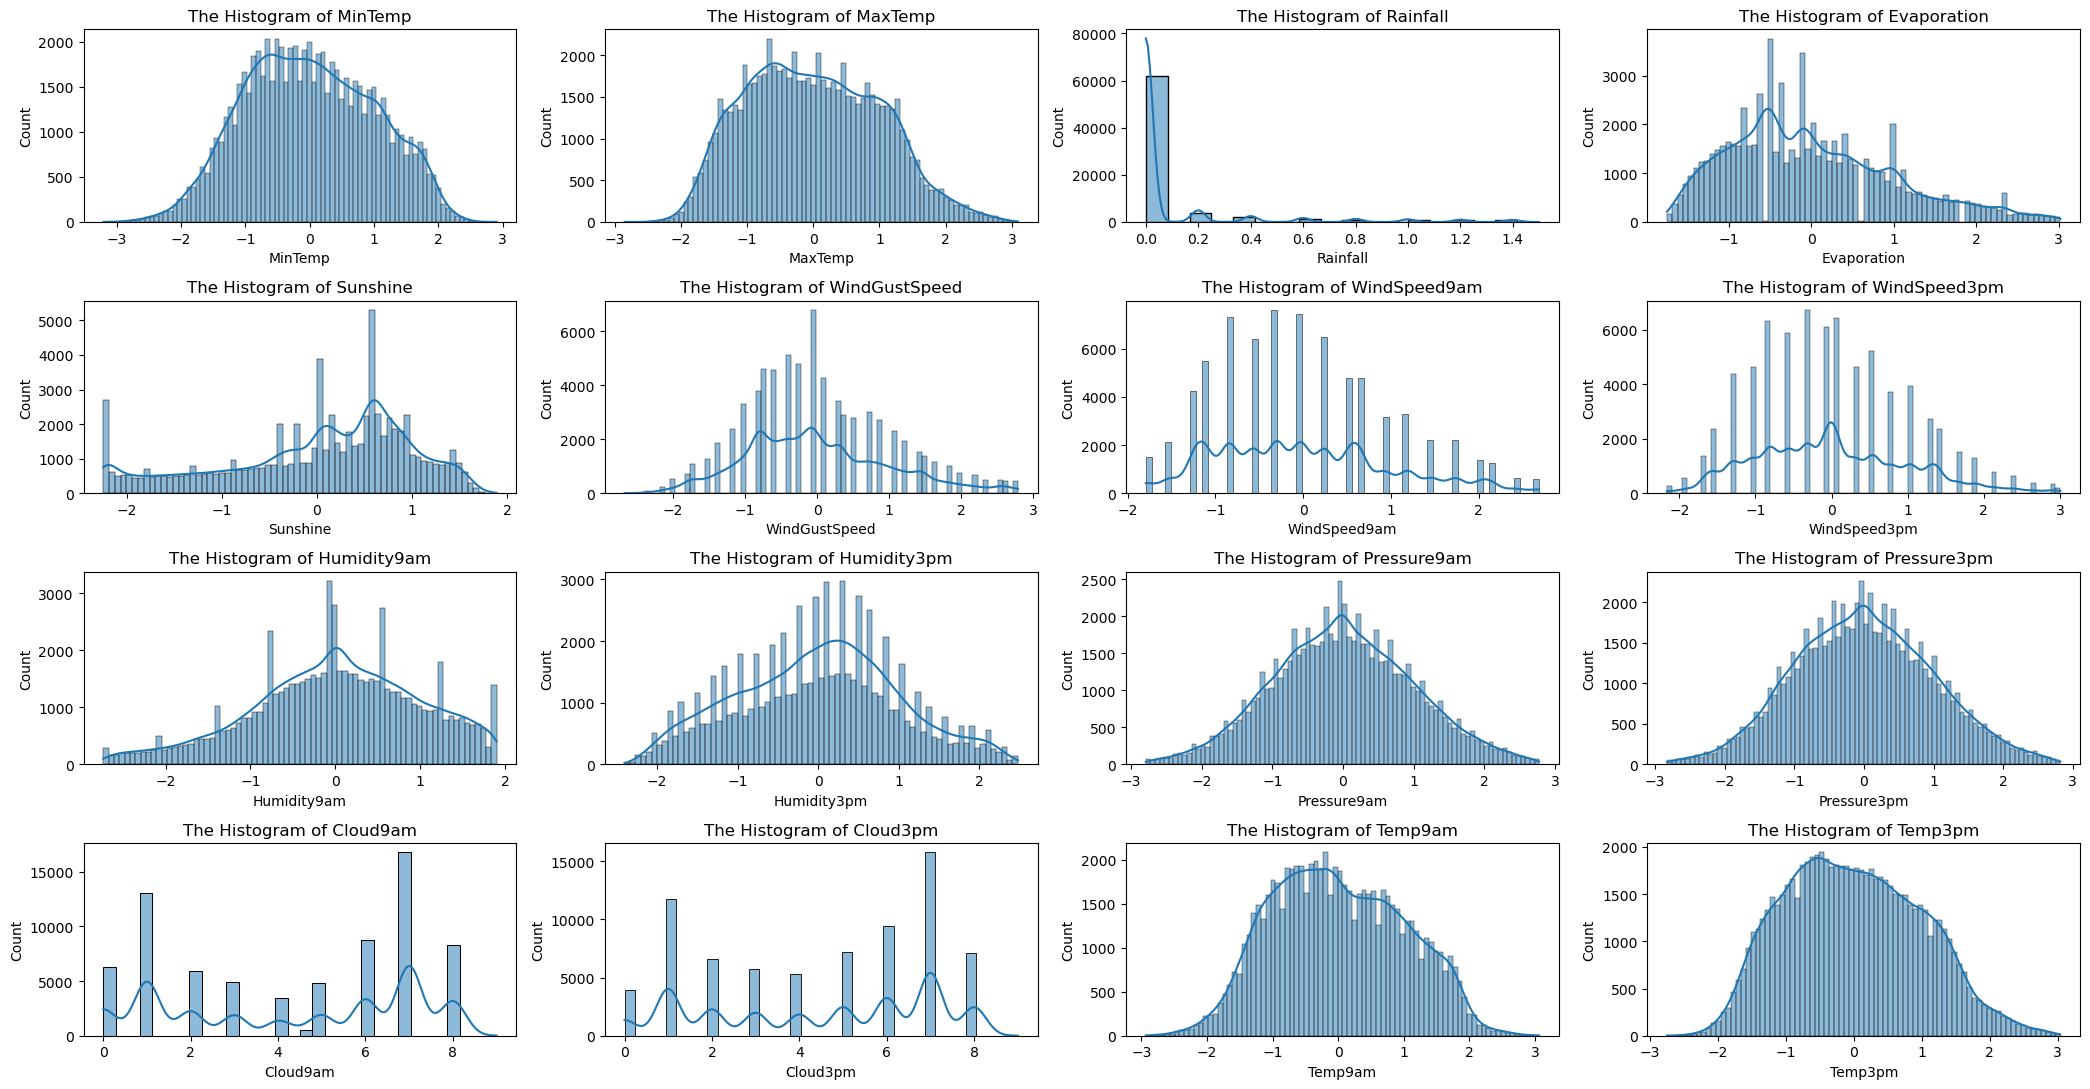

In [62]:
# Selecting specific columns from the dataset
cols = df.select_dtypes(include='float64').columns

# Defining the figure size
plt.figure(figsize=(21, 11))

# Making for loop for subplots
for col in range(len(cols)):
    # Defining subplot
    plt.subplot(4, 4, col+1)
    # Plotting histogram
    sns.histplot(x=df[cols[col]] , kde=True) 
    # Defining column name as title for each histogram
    plt.title(f'The Histogram of {cols[col]}')

# Adjusting the spacing between subplots
plt.tight_layout()  
plt.show()

## Label Encoding the categorical columns

In [63]:
# Selecting object columns from the dataset
object_col = df.select_dtypes(include='object').columns
# Defining the label encoder
le = LabelEncoder()
# Defining the for loop for label encoding
for col in object_col:
    df[col] = le.fit_transform(df[col])

## correlation matrix of numeric features except day, month & year

In [64]:
df.select_dtypes(include='float64').corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.747428,-0.028466,0.502211,0.068989,0.162461,0.142306,0.142237,-0.171101,0.056903,-0.494136,-0.505096,0.077343,0.021482,0.904884,0.724463
MaxTemp,0.747428,1.000000,-0.145347,0.628416,0.432810,0.078328,0.014058,0.017592,-0.451842,-0.455919,-0.373121,-0.461986,-0.269778,-0.258888,0.890480,0.984148
Rainfall,-0.028466,-0.145347,1.000000,-0.129446,-0.128354,0.016053,0.015902,0.031847,0.146244,0.152682,0.004641,0.036427,0.123679,0.112726,-0.091295,-0.148338
Evaporation,0.502211,0.628416,-0.129446,1.000000,0.372133,0.189318,0.161161,0.120132,-0.494693,-0.386829,-0.285367,-0.316479,-0.215346,-0.222712,0.588859,0.611349
Sunshine,0.068989,0.432810,-0.128354,0.372133,1.000000,-0.030182,0.009935,0.023598,-0.463031,-0.591986,0.037649,-0.020626,-0.615989,-0.627766,0.267044,0.453494
WindGustSpeed,0.162461,0.078328,0.016053,0.189318,-0.030182,1.000000,0.523185,0.639585,-0.184740,-0.046319,-0.378371,-0.335624,0.072952,0.101891,0.130395,0.045126
WindSpeed9am,0.142306,0.014058,0.015902,0.161161,0.009935,0.523185,1.000000,0.421474,-0.215874,-0.054919,-0.169492,-0.130421,0.011775,0.035049,0.082457,0.004403
WindSpeed3pm,0.142237,0.017592,0.031847,0.120132,0.023598,0.639585,0.421474,1.000000,-0.091871,0.043984,-0.270087,-0.231557,0.071149,0.036305,0.122629,-0.003326
Humidity9am,-0.171101,-0.451842,0.146244,-0.494693,-0.463031,-0.184740,-0.215874,-0.091871,1.000000,0.646192,0.107796,0.155931,0.431514,0.341095,-0.388181,-0.443842
Humidity3pm,0.056903,-0.455919,0.152682,-0.386829,-0.591986,-0.046319,-0.054919,0.043984,0.646192,1.000000,-0.050329,0.031548,0.507036,0.499948,-0.161558,-0.503017


## Heatmap of correlation matrix of numeric features except day, month & year

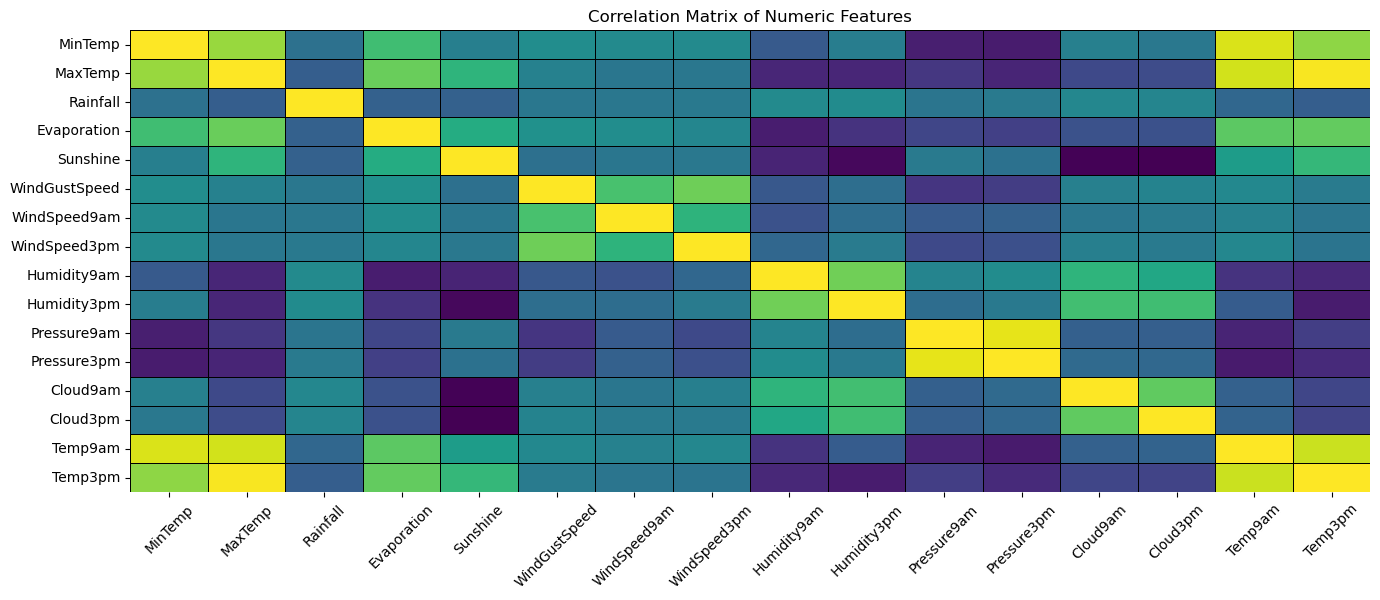

In [65]:
# Calculating the correlation matrix
corr_matrix = df.select_dtypes(include='float64').corr()

# Defining the figure size
plt.figure(figsize=(16,6))

# Plotting the heatmap
sns.heatmap(corr_matrix , cbar=False , cmap='viridis' , fmt='.2f' , linewidths=0.5, linecolor='black')

# Rotating the x axis labels
plt.xticks(rotation=45)

# Setting up the title
plt.title('Correlation Matrix of Numeric Features')
plt.show()

## Heatmap of correlation of highly correlated features

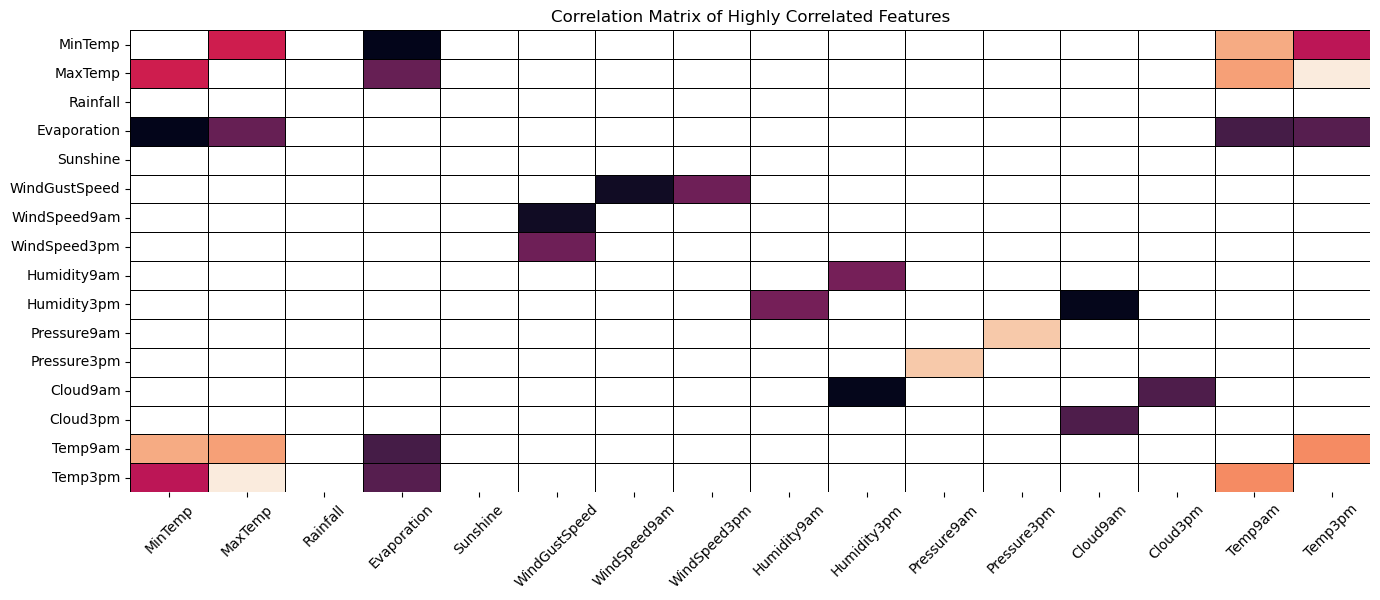

In [66]:
# Correlation matrix of highly correlated features

# Setting up the figure size
plt.figure(figsize=(16,6))
# Calculating the correlation matrix
corr = df.select_dtypes(include='float64').corr() 
# Plotting the heatmap of correlation matrix which have a correlation greater than 0.5 and less than 0.99
sns.heatmap(corr[(corr>0.5) & (corr<0.99)] , cbar=False , fmt='.2f' , linewidths=0.5, linecolor='black') 
# Rotating the x axis labels
plt.xticks(rotation=45)
# Setting up the title
plt.title('Correlation Matrix of Highly Correlated Features')
plt.show()

## Observation:
Some of the columns like MinTemp & MaxTemp shows a higly positive correlation with Temp9am & Temp3pm. As during the day time MinTemp is almost equal to Temp9am and temperature is high during afternoon which means Temp3pm is equal to MaxTemp That's why they shows higly positive correlation. Similarly, Pressure9am and Pressure3pm shows a higly positive correlation. The reason is that atmospheric pressure is remianed almost similar of a placce

## Checking the distribution of RainTomorrow

In [67]:
# Checking the value counts of `RainTomorrow`
df['RainTomorrow'].value_counts()

RainTomorrow
0    57161
1    15705
Name: count, dtype: int64

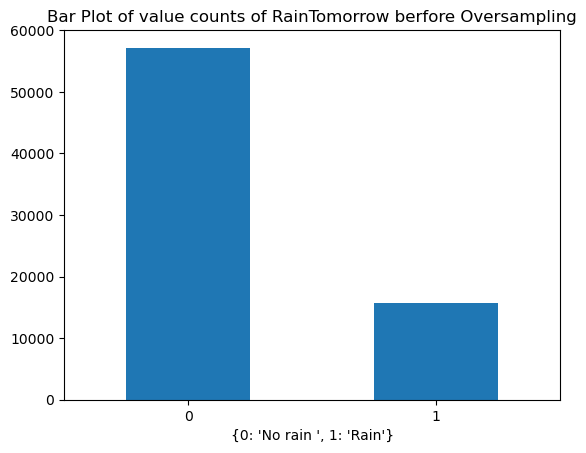

In [68]:
# Checking the count plot of unique values of `RainTomorrow`
df['RainTomorrow'].value_counts().plot(kind='bar')
# Setting up the title
plt.title('Bar Plot of value counts of RainTomorrow berfore Oversampling')
# Rotating the x axis labels
plt.xticks(rotation=360)
plt.xlabel({0: 'No rain ', 1:'Rain'})
plt.show()

## Observations:
Notice how imbalanced is our original dataset! Most of the enteries are with no rain. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most of time there is no rain. But we don't want our model to assume, we want our model to detect patterns that give signs of rain!

The target variable has class imbalance The value count of RainTomorrow is 0 which means No is 57161 whereas, the count of RainTomorrow = 1 means Yes has only 15705 records.

Hence, to sort this issue we can use oversampling technique SMOTE

## Oversampling using SMOTE

In [69]:
# Definig the X and y

X_resample = df.drop('RainTomorrow' , axis=1)

y_resample = df['RainTomorrow']

# Splitting the data into train and test
X_train_resample , X_test_resample , y_train_resample , y_test_resample = train_test_split(X_resample , y_resample , test_size=0.2 , random_state=42)

# Calling SMOTE
smote = SMOTE(random_state=42)

# Applying SMOTE on training data
X_train_resample , y_train_resample = smote.fit_resample(X_train_resample , y_train_resample)

## Observations:
SMOTE is a synthtetic minority oversampling technique which is used to deal with imbalanced dataset in Machine Learning. It works by generating synthetic samples for the minority class to balance the class distribution.

How SMOTE Works:

Selection of Minority Class Samples: SMOTE first selects a random sample from the minority class.

Finding Nearest Neighbors: It then finds the k-nearest neighbors (usually k=5) of the selected sample in the feature space.

Generating Synthetic Samples: For each selected sample, SMOTE randomly selects one of its k-nearest neighbors and generates a synthetic sample along the line segment joining the two samples. This is done by interpolating between the two samples

## Plotting Count Plot of RainTomorrow after Oversampling

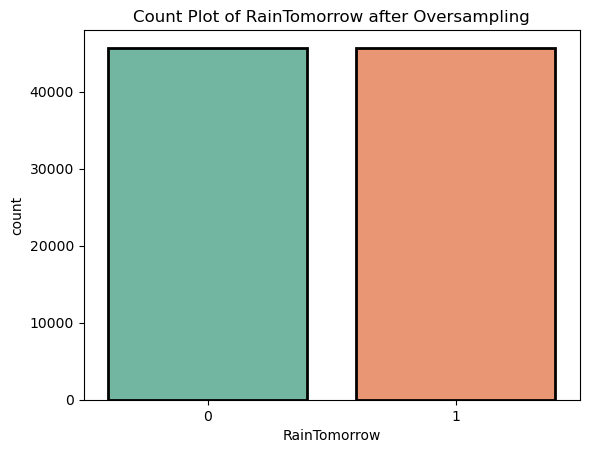

In [70]:
# Plotting the count plot
sns.countplot(x=y_train_resample , palette='Set2' , edgecolor='black' , linewidth=2 )
plt.title('Count Plot of RainTomorrow after Oversampling')
plt.show()

## Insights after Oversampling

In [71]:
before_sampling = X_resample.shape[0]
print (f"Number of rows before SMOTE: {before_sampling} \n")

after_sampling = X_train_resample.shape[0] + X_test_resample.shape[0]

print (f"Number of rows after SMOTE: {after_sampling} \n")

increase_in_rows =  after_sampling - before_sampling
print(f"Increase in number of rows after SMOTE: {increase_in_rows}")

Number of rows before SMOTE: 72866 

Number of rows after SMOTE: 106004 

Increase in number of rows after SMOTE: 33138


## Observations:
Before that we have 72866 instances in our dataset However, after applying SMOTE we have 106004 instances in our dataset which means that 33138 rows are synthetically added in our datase

## Definig Features & Target for Machine Learning

In [72]:
# Defining the X and y for logistic regression

# Dropping highly correlated features from the independent resampled training & testing data
X1 = X_train_resample.drop(['Temp9am', 'Temp3pm', 'Pressure3pm'] , axis=1)
X2 = X_test_resample.drop(['Temp9am', 'Temp3pm', 'Pressure3pm'] , axis=1)

# Concatenating the independent testing and training data
X = pd.concat([X1 , X2] , axis=0)

# Concatenating the dependent testing and training data
y1 = y_train_resample
y2 = y_test_resample

y = pd.concat([y1 , y2] , axis=0)

In [73]:
# Column name of our dependent feature
y.name

'RainTomorrow'

## Observations
Here X is the independent variable and y is the dependent variable which we take both from the resampled data from our indepedent variable for X we drop some higly correlated features like Temp9am, Temp3pm, Pressure3pm Hence, we have to drop one of them to avoid multicollinearity.

Redundant Information: Highly correlated features can provide redundant or similar information to the model, which might not improve predictive performance but could increase computational complexity.

Overfitting: In some cases, highly correlated features can lead to overfitting, where the model learns noise or irrelevant patterns from the data

## Model Building

In [74]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
# Feature Scaling (for models that require scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
# Creating an empty list to store results
result = []

In [77]:
# Define multiple classification models
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Logistic Regression": LogisticRegression(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "Naive Bayes": GaussianNB(),
}

In [78]:

# Fitting the models and evaluating their performance
for name, model in models.items():
    # Time for the fit process
    start_fit = time.time()

    # Fitting the model
    model.fit(X_train, y_train)

    # Ending time of the fit process
    end_fit = time.time()

    # Calculating the fit time for each model
    fit_time = end_fit - start_fit

    # Making predictions on test data
    y_pred = model.predict(X_test)

    # Calculating the accuracy score
    acc = accuracy_score(y_test, y_pred)
    # Calculating the precision score
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    # Calculating the recall score
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)

    # Appending the result in the list
    result.append((name, acc, precision, recall, fit_time))

# Printing the evaluation result of every model
result_df = pd.DataFrame(result, columns=['Model', 'Accuracy Score', 'Precision', 'Recall', 'Fit Time (s)'])

# Display the results
print(result_df)

# Selecting the best model based on the highest accuracy score
best_model_name = result_df.loc[result_df['Accuracy Score'].idxmax(), 'Model']
best_model = models[best_model_name]

# Display the best model
print(f"\nBest Model: {best_model_name} with Accuracy: {result_df['Accuracy Score'].max():.4f}")

# Fitting the best model on the entire training dataset
best_model.fit(X_train, y_train)

# Making predictions on the test data using the best model
y_pred_best = best_model.predict(X_test)

# Evaluating the best model's performance
best_acc = accuracy_score(y_test, y_pred_best)
best_precision = precision_score(y_test, y_pred_best, average='macro', zero_division=0)
best_recall = recall_score(y_test, y_pred_best, average='macro', zero_division=0)

# Displaying the performance of the best model
print("\nBest Model Performance on Test Data:")
print(f"Accuracy: {best_acc:.4f}")
print(f"Precision: {best_precision:.4f}")
print(f"Recall: {best_recall:.4f}")

                    Model  Accuracy Score  Precision    Recall  Fit Time (s)
0     K-Nearest Neighbors        0.853686   0.860553  0.859155      0.022588
1           Decision Tree        0.826989   0.825978  0.826991      2.842585
2           Random Forest        0.904061   0.903662  0.903360     45.634055
3  Support Vector Machine        0.847083   0.846131  0.846713    469.124266
4     Logistic Regression        0.801755   0.801162  0.799596      0.233513
5                AdaBoost        0.833027   0.832759  0.831049     13.288924
6                 XGBoost        0.902410   0.904890  0.899579      2.619410
7             Naive Bayes        0.767134   0.767234  0.768681      0.075785

Best Model: Random Forest with Accuracy: 0.9041

Best Model Performance on Test Data:
Accuracy: 0.9056
Precision: 0.9053
Recall: 0.9048


## Hyperparameter Tuning of Random Forest Classifier

## Hyperparameter Tuning using GridSearchCV

In [79]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],        # Number of trees
    'max_depth': [3, 5, 10, None],         # Maximum depth
    'min_samples_split': [2, 5, 10],       # Min samples to split a node
    'min_samples_leaf': [1, 2, 4],         # Min samples in a leaf
    'max_features': ['sqrt', 'log2']       # Number of features considered
}

# Perform Grid Search with Cross Validation
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate best model
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
print(f"Tuned Model Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Model Accuracy: 0.9058


## Conclusion (Model Comparison)

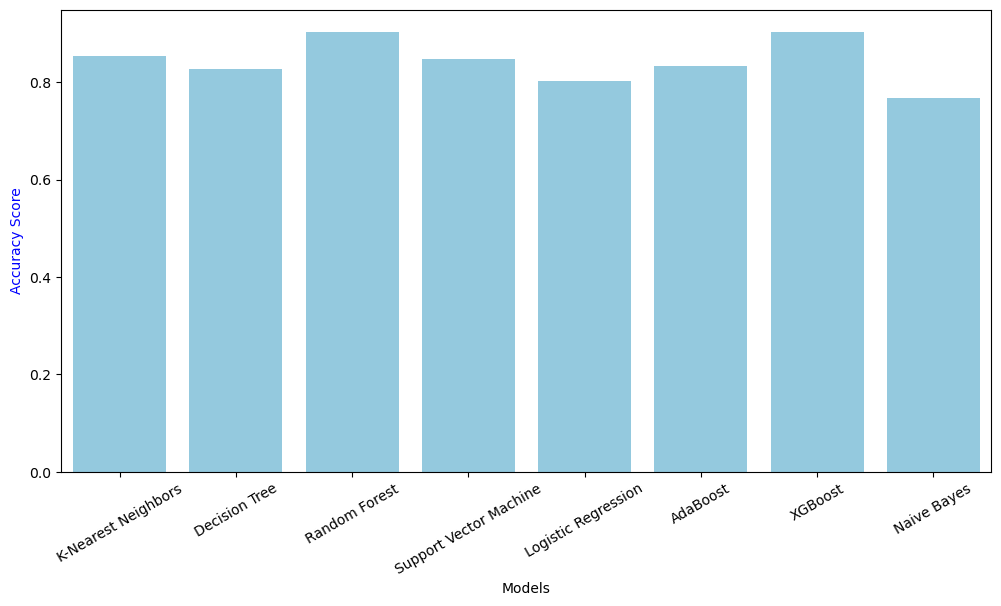

In [80]:
# Plotting the bar plot for accuracy scores
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for accuracy scores
sns.barplot(x='Model', y='Accuracy Score', data=result_df, ax=ax1, color='skyblue')
# Setting up the x and y label for 1st plot
ax1.set_xlabel('Models')
ax1.set_ylabel('Accuracy Score', color='blue')
# Rotating the x labels
plt.xticks(rotation=30)

# Show the plot
plt.show()

## The Best module is Random Forest.